Importa o modelo a ser fatiado e mapeado

rm: não foi possível remover '*.png': Arquivo ou diretório inexistente


g++ -O3 -std=c++11 -o main \
           main.cpp \
           point_r3_t.cpp \
           triangle_t.cpp \
           mesh_t.cpp \
           line_t.cpp \
           contour.cpp \
           write_svg.cpp \
           io.cpp \
           planes.cpp \
           incr_slicing.cpp \
           trivial_slicing.cpp \
           avl_t.cpp \
           polygon_t.cpp \
           predicates.cpp \
           image.cpp \
           -fpermissive -frounding-math -lm
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = 0, model zmax = 10, first plane Z = -1.996, number of planes = 7
-Incremental, aneu.STL, thickness = 2, #T = 464, #P = 5, #S = 1160, 0.000287s (slicing), 0.001301s (polygon assembling), 0.005842s (total), *K: 2.5


writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/s

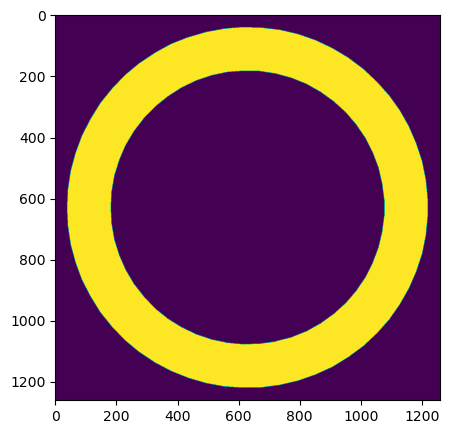

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer

#TODO: encontrar uma forma de jogar os parametros escolhidos DPI e layerHight para o slicing W/images
folders = files.Paths()
path_input, file_name = gui.load_model(folders)
[dpi, layer_height, void_max, internal_max, external_max, n_max] = gui.ask_parameters_input()
if file_name.endswith(".stl") or file_name.endswith(".STL"):
    camadas = files.load_layers_3d(folders, path_input, dpi, layer_height)
else:
    camadas = files.load_layers_2D(folders, path_input, dpi, layer_height)
plt.rcParams["figure.figsize"]=5,5
plt.imshow(camadas[0].original_img)
plt.show()

Paredes Finas

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 0.7663319110870361
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0026290416717529297
Total de [Fase 1: Camada: 0] : 0.80169677734375
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 0.7203972339630127
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.002862215042114258
Total de [Fase 1: Camada: 1] : 0.7519001960754395
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 0.6753079891204834
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0026488304138183594
Total de [Fase 1: Camada: 2] : 0.7069118022918701
Fase 1: Camada: 3
Criando paredes finas
Total de [Criando paredes finas] : 0.685976505279541
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0024237632751464844
Total de [Fase 1: Camada: 3] : 0.722083568572998
Fase 1: Camada: 4

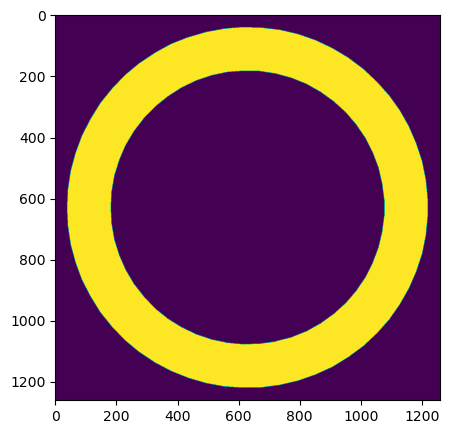

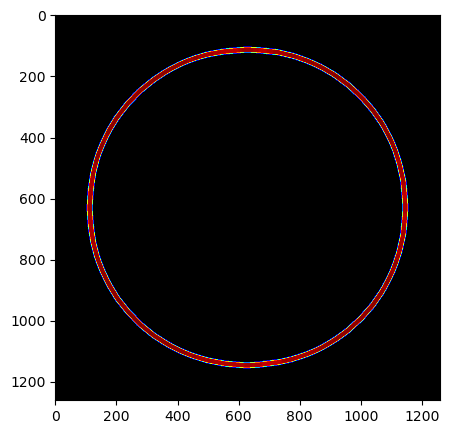

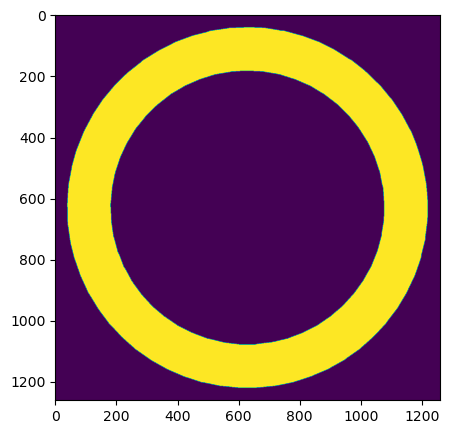

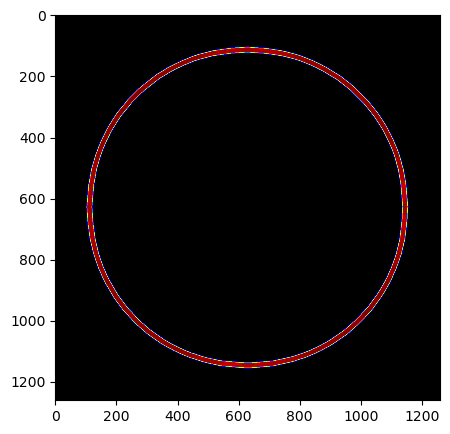

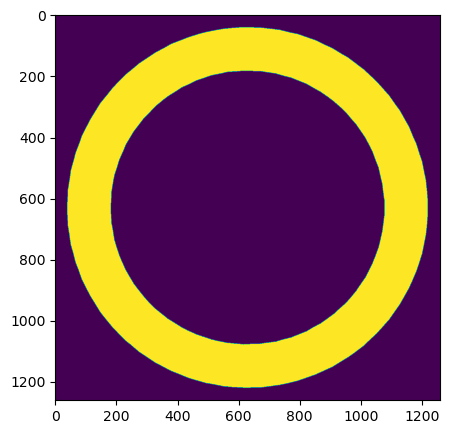

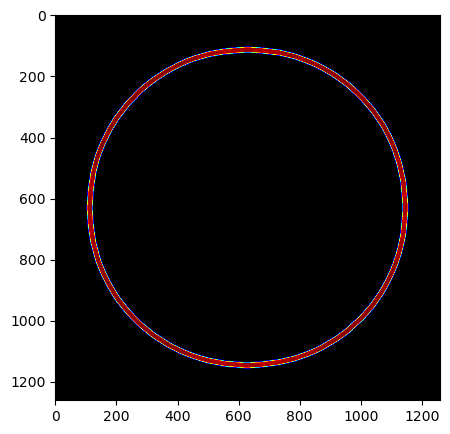

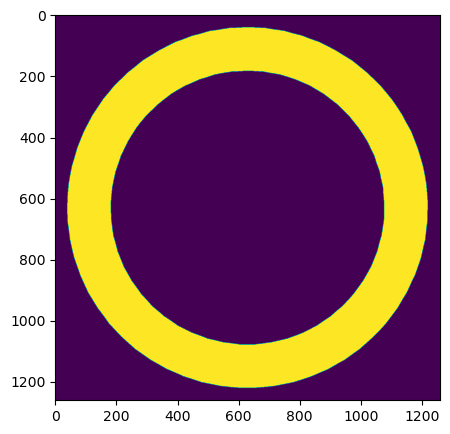

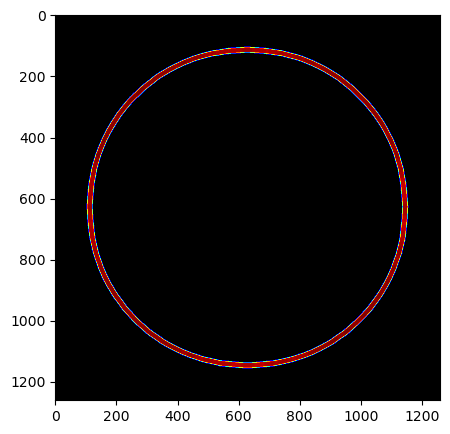

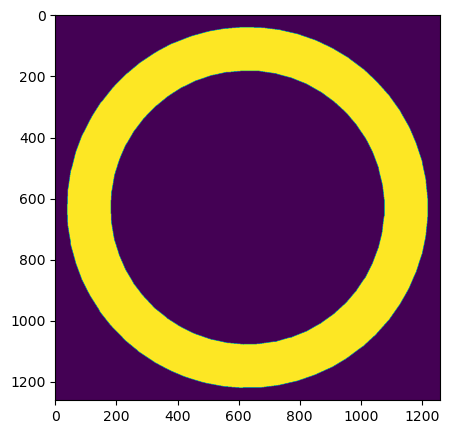

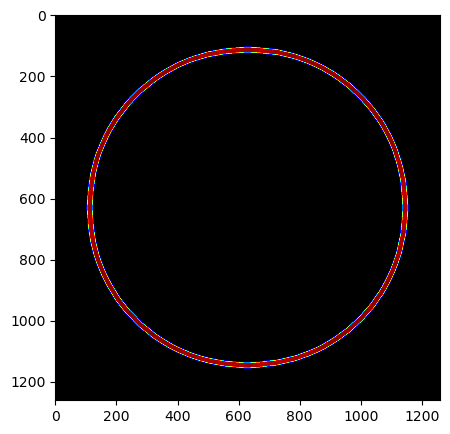

In [2]:
from ploters import mapping_thin_walls, mapping_thin_walls_medialAxis

[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
# from components.layer import Layer
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        c.make_thin_walls(nozzle_diam_external, nozzle_diam_internal)
        plt.figure()
        plt.imshow(mapping_thin_walls(c))
        plt.figure()
        cmap = plt.get_cmap("jet")
        cmap.set_under(color='black')
        plt.imshow(mapping_thin_walls_medialAxis(c), cmap=cmap, vmin=0.1)
        